In this example, we are trying to generate a CDF (Cumulitive Distrubution Function) for a price in Seattle.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns
import qgrid
import datetime
import sympy as S
import scipy
#import probability

In [20]:
# CSV import and price wrangling to convert it to numeric by removing $ and .
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 2000)

data_list = pd.read_csv("../seattlelistings.csv")
data_cal = pd.read_csv("../seattlecalendar.csv")
data_rev = pd.read_csv("../seattlereviews.csv")

data_list['price'] = (data_list['price'].str.replace('$', ''))
data_list['price'] = (data_list['price'].str.replace('.00', ''))

data_list['price'] = pd.to_numeric(data_list['price'])

data_cal['price'] = (data_cal['price'].str.replace('$', ''))
data_cal['price'] = (data_cal['price'].str.replace('.00', ''))
data_cal['price'] = (data_cal['price'].str.replace(',', ''))

data_cal['price'] = pd.to_numeric(data_cal['price'])

data_cal=data_cal.drop(columns='price')


In [21]:
data_cal.rename(columns={'listing_id': 'id'},inplace=True)

In [22]:
data_list=data_list[['id','price']]

data_final = pd.merge(data_cal, data_list, how='left', on=['id'])

In [23]:
result_price_xavailable=data_final[data_final['available']=='f']
result_price_xavailable=result_price_xavailable.groupby('date')['price'].mean()

In [24]:
# import of these custom libraries, courtesey Allan Downey from Thinkstats2.
import thinkstats2
import thinkplot

In [25]:
cdf = thinkstats2.Cdf(data_list.price, label='Price')

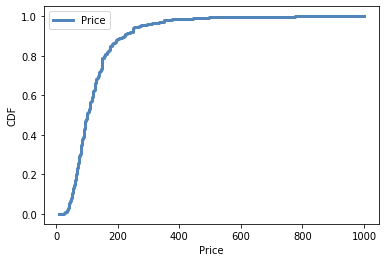

<Figure size 576x432 with 0 Axes>

In [26]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf])
thinkplot.Show(xlabel='Price', ylabel='CDF')